# Narysuj diagram kolor-kolor

In [1]:
!pip install astroquery

You should consider upgrading via the '/Users/tr/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
from astroquery.simbad import Simbad
# https://astroquery.readthedocs.io/en/latest/simbad/simbad.html
Simbad.add_votable_fields('typed_id')

### Ścieżka do folderu z danymi

In [4]:
import os

data_directory_path= os.path.join("..","data") # Jeżeli zapisaliśmy dane gdzieś indziej musimy tutaj zmienić.
print(data_directory_path)

../data


### Czytanie danych z bazy Simbad

In [5]:
Simbad.list_votable_fields()

--NOTES--

1. The parameter filtername must correspond to an existing filter. Filters include: B,V,R,I,J,K.  They are checked by SIMBAD but not astroquery.simbad

2. Fields beginning with rvz display the data as it is in the database. Fields beginning with rv force the display as a radial velocity. Fields beginning with z force the display as a redshift

3. For each measurement catalog, the VOTable contains all fields of the first measurement. When applicable, the first measurement is the mean one. 

Available VOTABLE fields:

bibcodelist(y1-y2)
biblio
cel
cl.g
coo(opt)
coo_bibcode
coo_err_angle
coo_err_maja
coo_err_mina
coo_qual
coo_wavelength
coordinates
dec(opt)
dec_prec
diameter
dim
dim_angle
dim_bibcode
dim_incl
dim_majaxis
dim_minaxis
dim_qual
dim_wavelength
dimensions
distance
distance_result
einstein
fe_h
flux(filtername)
flux_bibcode(filtername)
flux_error(filtername)
flux_name(filtername)
flux_qual(filtername)
flux_system(filtername)
flux_unit(filtername)
fluxdata(filtername)

In [6]:
for vo_field in ["flux(U)","flux(B)","flux(V)","mk"]:
    Simbad.add_votable_fields(vo_field)

In [7]:
result_table = Simbad.query_objects(["* alf Ori"])

In [8]:
result_table= result_table.to_pandas()
result_table

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,TYPED_ID,FLUX_U,FLUX_B,FLUX_V,MK_ds,MK_mss,MK_Spectral_type,MK_bibcode,SCRIPT_NUMBER_ID
0,b'* alf Ori',05 55 10.3053,+07 24 25.430,9,9,9.04,5.72,90,A,O,b'2007A&A...474..653V',b'* alf Ori',4.38,2.27,0.42,,,b'Ma',1993yCat.3135....0C,1


In [9]:
FLUX_U= result_table["FLUX_U"].values
FLUX_B= result_table["FLUX_B"].values
FLUX_V= result_table["FLUX_V"].values
print(FLUX_U, FLUX_B, FLUX_V)

[4.38] [2.27] [0.42]


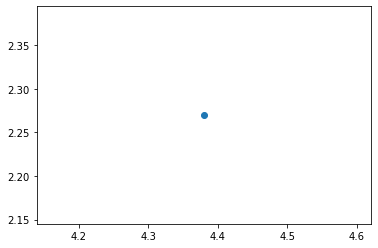

In [10]:
import matplotlib.pyplot as plt
plt.scatter(FLUX_U, FLUX_B)

### Zadanie 1

* Wczytaj listę gwiazd `star_list.dat`

* Narysuj diagram kolor-kolor dla tych gwiazd: (U-B) vs. (B-V)

* Wybierz po jednej gwieździe z każdego typu widmowego i pobierz ich widma wykonane w projekcie [UVES POP (Field Stars)](http://www.eso.org/sci/observing/tools/uvespop/field_stars_uptonow.html), wyświetl na rysunku ich linie widmową - H$\alpha$. (~6650)

In [16]:
spectrum_path = "../data/hd145482.dat"
wave = []
flux = []
with open(spectrum_path) as f:
    for line in f:
        w,f,_ = line.split()
        wave.append(float(w))
        flux.append(float(f))

<IPython.core.display.Javascript object>


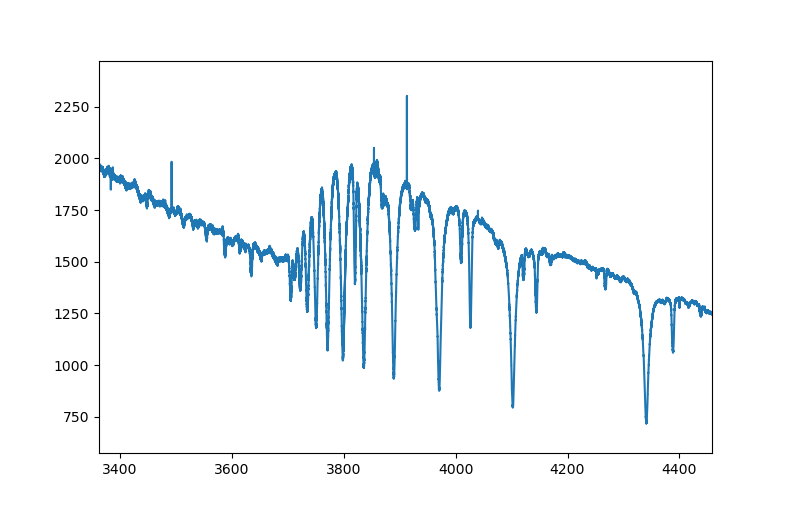

In [18]:
%matplotlib notebook
plt.figure()
plt.plot(wave,flux)

In [ ]:
file_path= os.path.join(data_directory_path,"star_list.txt")

In [ ]:
stars_names= [] # Poniżej wczytaj nazwy gwiazd do pustej listy star_names
# ...

In [ ]:
# Użyj Simbad.query_objects żeby pobrać informacje o wszystkich gwiazdach

In [ ]:
# Oblicz kolory U-B i B-V

In [ ]:
# Wyświetl wykorzystując plt.scatter(U_B, B_V) diagram kolor-kolor

### Zadanie 2 - Wyszukiwanie binarne

Jest to szybkie sposób wyszukiwania w posortowanym kontenerze.

Żeby znaleźć liczbę `X` w danym kontenerze (np. liście) algorytm przebiega następująco:
1. Pobierz liczbę ze środka listy (element `M`) i porównaj ją z `X`.
2. Jeżeli `X==M` to skończyłeś.
3. Jeżeli `X>M`, znajdź środek `M+1` w kierunku końca listy.
4. Jeśli `X<M`, znajdź środek `M-1` w kierunku początku listy.
5. Powtarzaj te kroki, aż znajdziesz M lub pozostanie Ci tylko 1 element.

In [8]:
import numpy as np

# Przygotowanie danych
N = 10000000
x = np.random.choice(10*N,size=N,replace=False)
x = np.sort(x)
x = list(x)

In [11]:
import time
start = time.time()

wyszukiwanie_binarne(x, 1000000//3)
    
end = time.time()
print(end - start)

start = time.time()

wyszukiwanie_liniowe(x, 1000000//3)
    
end = time.time()
print(end - start)

start = time.time()

np.searchsorted(x, 1000000//3)
    
end = time.time()
print(end - start)

0.00010800361633300781
2.007519006729126
0.7774360179901123


In [4]:
def wyszukiwanie_binarne(vec, szukany_element):
    idx_poczatek = 0
    idx_koniec = len(vec)
    
    while True:
        M = (idx_koniec + idx_poczatek) // 2
#         print(idx_poczatek, M, idx_koniec)
        if vec[M] == szukany_element:
            return M
        elif szukany_element > vec[M]:
            idx_poczatek = M
        else:
            idx_koniec = M
        # ----
        if idx_koniec - idx_poczatek == 1:
            break
            
    return None

print(wyszukiwanie_binarne(x, 120))     

10


In [5]:
def wyszukiwanie_liniowe(vec, szukany_element):
    idx = 0
    for obecny_element in vec:
        if obecny_element == szukany_element:
            return idx
        # zlicz które przejście for'a
        idx += 1
        
    return None

wyszukiwanie_liniowe(x, 540)

In [39]:
x[11]

100

### Zadanie 3 - Quick sort
Zaimplementuj na podstawie [artykułu na Wikipedii.](https://pl.m.wikipedia.org/wiki/Sortowanie_szybkie)
* Idea na [filmie](https://youtu.be/ott_oZH-l4o).